In [24]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow
import torch
import os
from IPython.display import Image, clear_output # to display images

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.
/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/yolov5
DEPRECATION: Loading egg at /home/rayhaan/.pyenv/versions/3.12.3/lib/python3.12/site-packages/detectron2-0.6-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /home/rayhaan/.pyenv/versions/3.12.3/lib/python3.12/site-packages/detectron2-0.6-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can 

In [ ]:
import torch
import os
from IPython.display import Image, clear_output, display  # to display images
from roboflow import Roboflow
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [ ]:

# Initialize Roboflow and download the original dataset (version 1)
rf = Roboflow(api_key="Removed for security reasons")
project_v1 = rf.workspace("removed for security reasons").project("removed for security reasons")
version_1 = project_v1.version(1)
dataset_v1 = version_1.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cavities-1 in yolov5pytorch:: 100%|██████████| 260/260 [00:00<00:00, 7379.64it/s]


In [ ]:
# Initialize Roboflow and download the new dataset (version 10)
project_v10 = rf.workspace("removed for security reasons").project("dental-structure-detection")
version_10 = project_v10.version(10)
dataset_v10 = version_10.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-structure-detection-10 in yolov5pytorch:: 100%|██████████| 2106/2106 [00:00<00:00, 7645.50it/s]


In [28]:
# Set dataset paths for original dataset (version 1)
train_dir_v1 = os.path.join(dataset_v1.location, 'train', 'images')
val_dir_v1 = os.path.join(dataset_v1.location, 'valid', 'images')
test_dir_v1 = os.path.join(dataset_v1.location, 'test', 'images')

# Set dataset paths for new dataset (version 10)
train_dir_v10 = os.path.join(dataset_v10.location, 'train', 'images')
val_dir_v10 = os.path.join(dataset_v10.location, 'valid', 'images')
test_dir_v10 = os.path.join(dataset_v10.location, 'test', 'images')

In [29]:
# Create custom YAML config file for version 10
yaml_content_v10 = f"""
train: {train_dir_v10}
val: {val_dir_v10}
test: {test_dir_v10}

nc: 9
names: ['bite block', 'braces', 'calculus', 'cavity', 'cervical burnout', 'filling', 'implant', 'tooth',  'wire']
"""

# Save the YAML configuration
with open("data/dental_v10.yaml", "w") as yaml_file_v10:
    yaml_file_v10.write(yaml_content_v10)

In [30]:

# Create custom YAML config file for version 1
yaml_content_v1 = f"""
train: {train_dir_v1}
val: {val_dir_v1}
test: {test_dir_v1}

nc: 3
names: ['Carries', 'Fillings', 'tooth']
"""

# Save the YAML configuration
os.makedirs('data', exist_ok=True)
with open("data/dental_v1.yaml", "w") as yaml_file:
    yaml_file.write(yaml_content_v1)

In [31]:
# Train YOLOv5 model on dataset version 1
!python train.py --img 640 --batch 16 --epochs 150 --data data/dental_v1.yaml --weights yolov5s.pt --name yolov5_v1

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-04 15:04:05.687270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 15:04:05.776104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 15:04:05.802295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [32]:
# Train YOLOv5 model on dataset version 10
!python train.py --img 640 --batch 16 --epochs 150 --data data/dental_v10.yaml --weights yolov5s.pt --name yolov5_v10

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-04 15:08:59.813723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 15:08:59.828379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 15:08:59.832826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [33]:
# Fine-tune model_v10 on dataset version 1
!python train.py --weights runs/train/yolov5_v10/weights/best.pt --data data/dental_v1.yaml --epochs 150 --batch-size 16 --img 640 --name yolov5_v10_finetuned

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-04 15:39:49.775667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 15:39:49.790437: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 15:39:49.794762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [34]:
# Fine-tune model_v10 on dataset version 1
!python train.py --weights runs/train/yolov5_v1/weights/best.pt --data data/dental_v10.yaml --epochs 150 --batch-size 16 --img 640 --name yolov5_v1_finetuned

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-04 15:45:27.482791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 15:45:27.496118: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 15:45:27.499887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [35]:
# Load the YOLOv5 models using Torch Hub

# Path definitions (adjust paths as per your directory structure)
model_v1_path = 'runs/train/yolov5_v1/weights/best.pt'
model_v10_path = 'runs/train/yolov5_v10/weights/best.pt'
model_v10_finetuned_path = 'runs/train/yolov5_v10_finetuned/weights/best.pt'

# Load models
model_v1 = torch.hub.load('ultralytics/yolov5', 'custom', path=model_v1_path, force_reload=True)
model_v10 = torch.hub.load('ultralytics/yolov5', 'custom', path=model_v10_path, force_reload=True)
model_v10_finetuned = torch.hub.load('ultralytics/yolov5', 'custom', path=model_v10_finetuned_path, force_reload=True)

# Set models to evaluation mode
model_v1.eval()
model_v10.eval()
model_v10_finetuned.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/rayhaan/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/rayhaan/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/rayhaan/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Using cache found in /home/rayhaan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /home/rayhaan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /home/rayhaan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /home/rayhaan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-4 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDI

Loaded image from test set: image_262_jpg.rf.6d001d58f1befba21f3433630e92aa7c.jpg


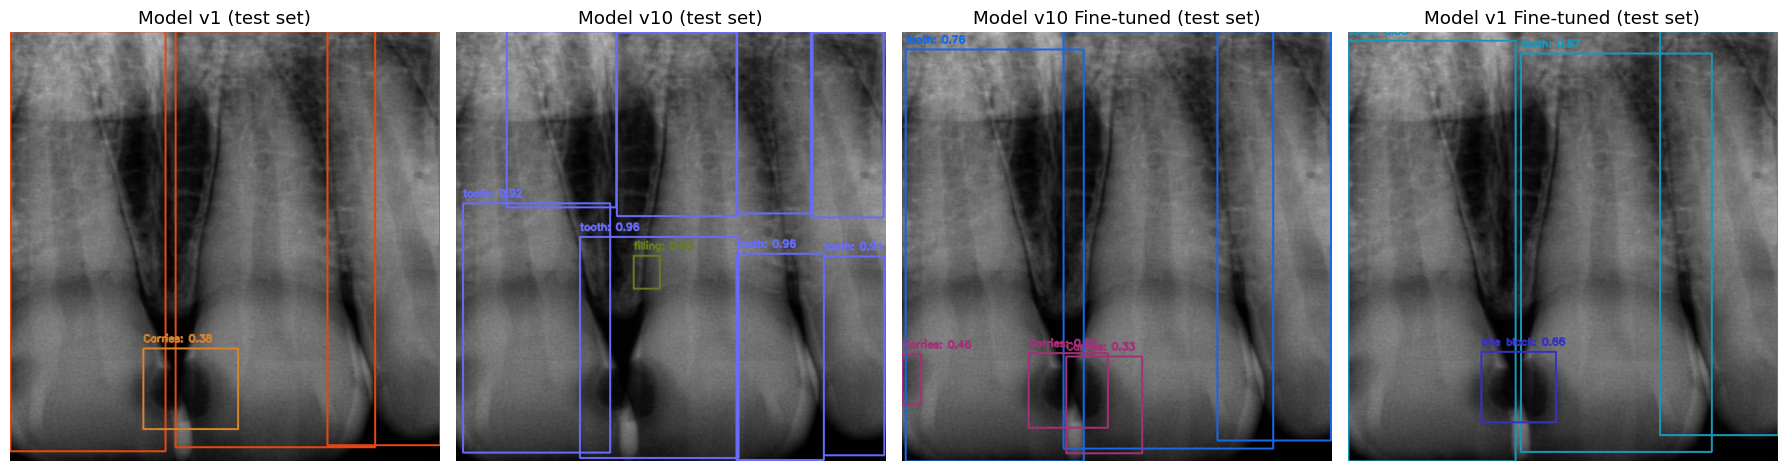

Loaded image from valid set: image_12_jpg.rf.a2e9ec9f33397d2bf7708c371bd95e69.jpg


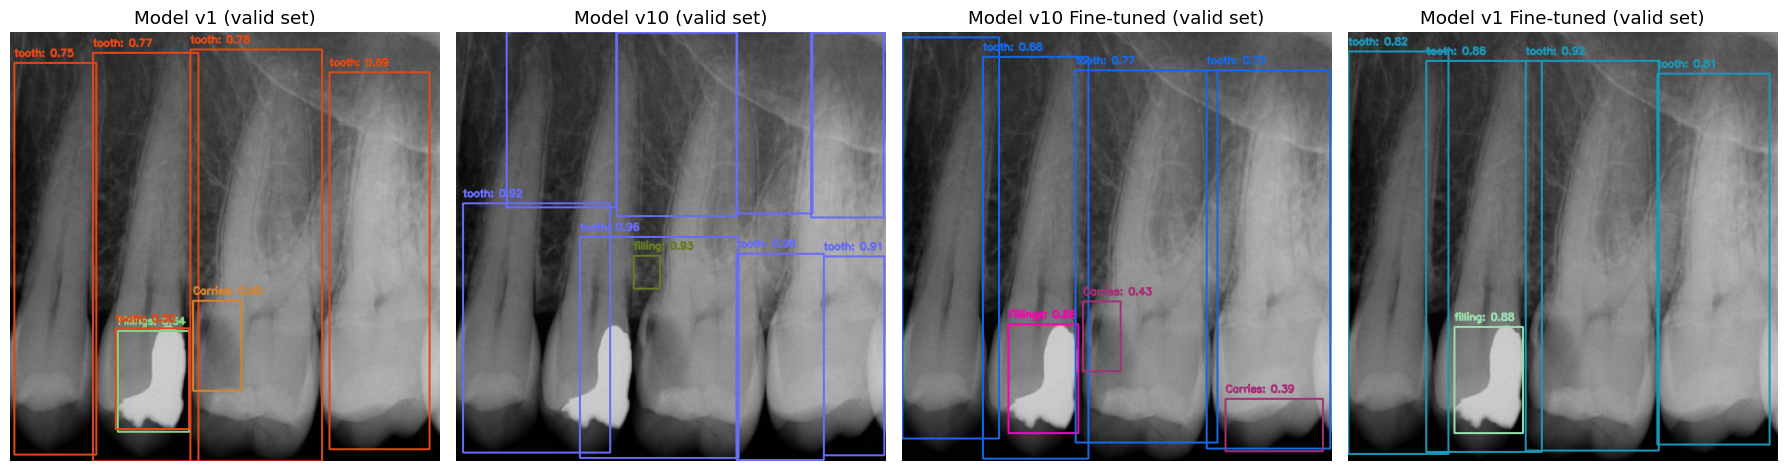

Loaded image from train set: image_219_jpg.rf.736da0f9defe33183e0147f61b51d038.jpg


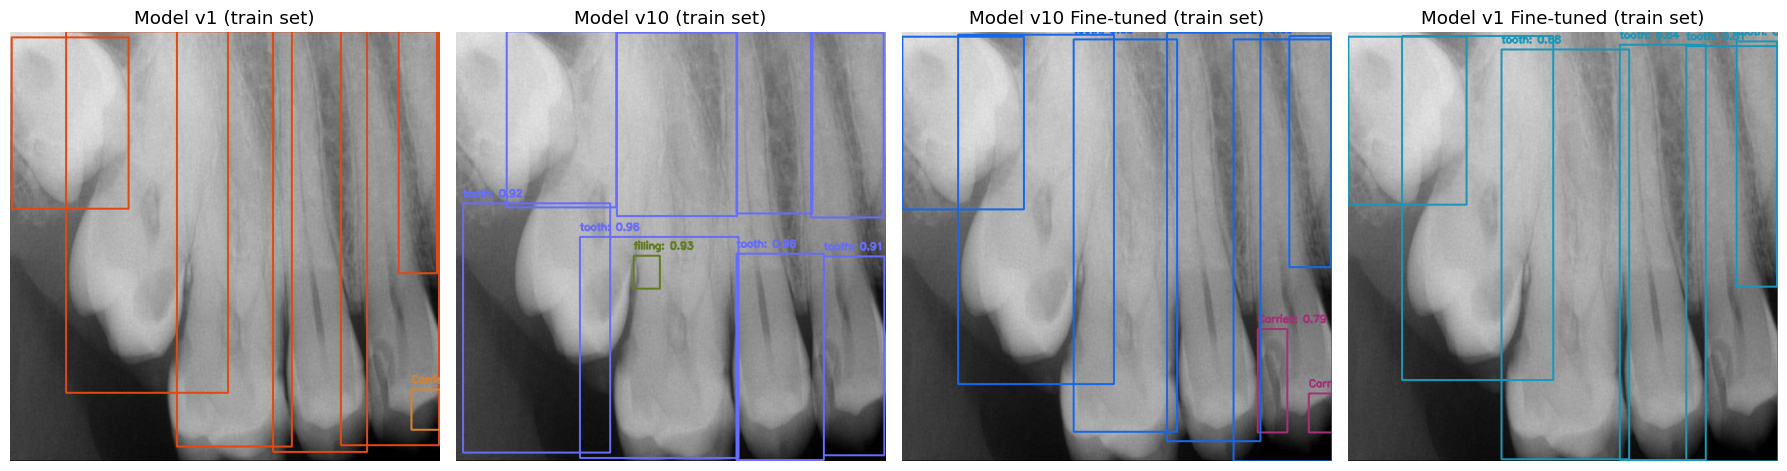

In [46]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
%matplotlib inline

# Load the YOLOv5 models
model_v1 = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/runs/train/yolov5_v12/weights/best.pt')
model_v10 = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/runs/train/yolov5_v10/weights/best.pt')
model_v10_finetuned = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/runs/train/yolov5_v10_finetuned/weights/best.pt')
model_v1_finetuned = torch.hub.load('ultralytics/yolov5','custom',path='/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/runs/train/yolov5_v1_finetuned/weights/best.pt')
# Directories containing the images
img_dirs = {
    "test": '/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/Cavities-1/test/images',
    "valid": '/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/Cavities-1/valid/images',
    "train": '/home/rayhaan/2024/My Stuff/research projrct/Research_Project/gpt/yolov5/Cavities-1/train/images'
}

# Function to choose a random image from a given directory
def choose_random_image(img_dir):
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
    random_img_file = random.choice(img_files)
    img_path = os.path.join(img_dir, random_img_file)
    img = Image.open(img_path)
    return img, random_img_file

# Function to annotate and return an image with boxes
def plot_boxes(img, detections, title, class_labels, colors):
    img = np.array(img)
    for x1, y1, x2, y2, conf, cls in detections:
        cls = int(cls)  # Ensure class index is an integer
        color = [int(c) for c in colors[cls]]  # Get a unique color for each class
        
        # Draw rectangle around detected object
        img = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        
        # Display class name and confidence
        label = f"{class_labels[cls]}: {conf:.2f}"
        img = cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return img

# Class labels for each model
class_labels_v1 = model_v1.names  # Class labels for model_v1
class_labels_v10 = model_v10.names  # Class labels for model_v4
class_labels_v10_finetuned = model_v10_finetuned.names  # Class labels for model_v4_finetuned
class_labels_v1_finetuned=model_v1_finetuned.names
# Generate random colors for each class
colors_v1 = np.random.randint(0, 255, size=(len(class_labels_v1), 3), dtype='uint8')
colors_v10 = np.random.randint(0, 255, size=(len(class_labels_v10), 3), dtype='uint8')
colors_v10_finetuned = np.random.randint(0, 255, size=(len(class_labels_v10_finetuned), 3), dtype='uint8')
colors_v1_finetuned = np.random.randint(0, 255, size=(len(class_labels_v1_finetuned), 3), dtype='uint8')
# Process images for test, valid, and train directories
for split in ["test", "valid", "train"]:
    # Get a random image from the specified directory
    img, img_name = choose_random_image(img_dirs[split])
    print(f"Loaded image from {split} set: {img_name}")
    
    # Run inference with each model
    results_v1 = model_v1(img)
    results_v10 = model_v10(img)
    results_v10_finetuned = model_v10_finetuned(img)
    results_v1_finetuned= model_v1_finetuned(img)
    # Convert results to a format compatible with plotting
    detections_v1 = results_v1.xyxy[0].cpu().numpy()
    detections_v10 = results_v10.xyxy[0].cpu().numpy()
    detections_v10_finetuned = results_v10_finetuned.xyxy[0].cpu().numpy()
    detections_v1_finetuned = results_v1_finetuned.xyxy[0].cpu().numpy()
    
    # Prepare images with detection boxes for all models
    img_v1 = plot_boxes(img.copy(), detections_v1, "Model v1", class_labels_v1, colors_v1)
    img_v10 = plot_boxes(img.copy(), detections_v4, "Model v10", class_labels_v10, colors_v10)
    img_v10_finetuned = plot_boxes(img.copy(), detections_v10_finetuned, "Model v10 Fine-tuned", class_labels_v10_finetuned, colors_v10_finetuned)
    img_v1_finetuned = plot_boxes(img.copy(), detections_v1_finetuned, "Model v1 Fine-tuned", class_labels_v1_finetuned, colors_v1_finetuned) 
    # Plot the images side-by-side for comparison
    fig, ax = plt.subplots(1, 4, figsize=(18, 6))
    ax[0].imshow(img_v1)
    ax[0].set_title(f"Model v1 ({split} set)")
    ax[0].axis("off")
    
    ax[1].imshow(img_v10)
    ax[1].set_title(f"Model v10 ({split} set)")
    ax[1].axis("off")
    
    ax[2].imshow(img_v10_finetuned)
    ax[2].set_title(f"Model v10 Fine-tuned ({split} set)")
    ax[2].axis("off")
    
    ax[3].imshow(img_v1_finetuned)
    ax[3].set_title(f"Model v1 Fine-tuned ({split} set)")
    ax[3].axis("off")
    # Show the plot
    plt.tight_layout()
    plt.show()